<a href="https://colab.research.google.com/github/ahamedifham/CS5803/blob/main/Ifham_PCA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
file_path = '/content/drive/MyDrive/Acoustic Features.csv'

Mounted at /content/drive


In [6]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv(file_path)

In [7]:
# Check for missing values
print(df.isnull().sum())
df_filled = df.fillna(df.mean())



Class                                             0
_RMSenergy_Mean                                   0
_Lowenergy_Mean                                   0
_Fluctuation_Mean                                 0
_Tempo_Mean                                       0
_MFCC_Mean_1                                      0
_MFCC_Mean_2                                      0
_MFCC_Mean_3                                      0
_MFCC_Mean_4                                      0
_MFCC_Mean_5                                      0
_MFCC_Mean_6                                      0
_MFCC_Mean_7                                      0
_MFCC_Mean_8                                      0
_MFCC_Mean_9                                      0
_MFCC_Mean_10                                     0
_MFCC_Mean_11                                     0
_MFCC_Mean_12                                     0
_MFCC_Mean_13                                     0
_Roughness_Mean                                   0
_Roughness_S

<ipython-input-7-4011979a3bde>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled = df.fillna(df.mean())


In [4]:
!pip install pandas matplotlib

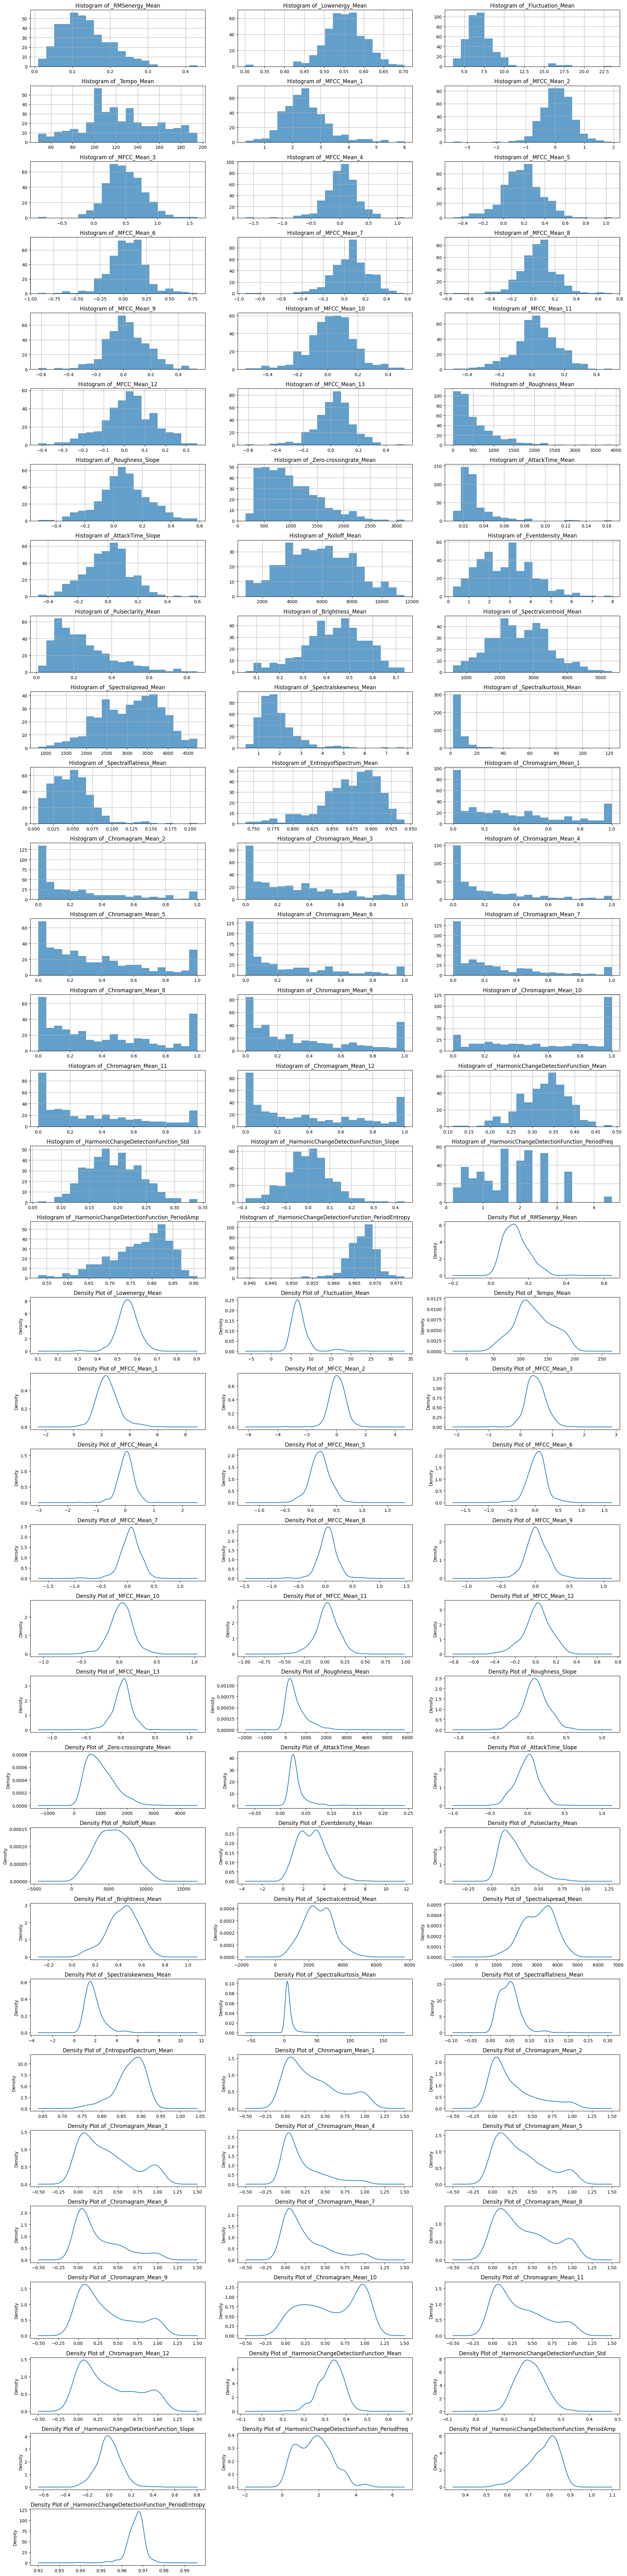

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 120))

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(len(numerical_features), 3, i)  # Adjust columns as needed
    # Histogram
    df[feature].hist(bins=20, alpha=0.7)
    plt.title(f'Histogram of {feature}')

    # Next subplot for density plot
    plt.subplot(len(numerical_features), 3, i + len(numerical_features))
    df[feature].plot(kind='density')
    plt.title(f'Density Plot of {feature}')

plt.tight_layout()
plt.show()

In [9]:
pip install scikit-learn

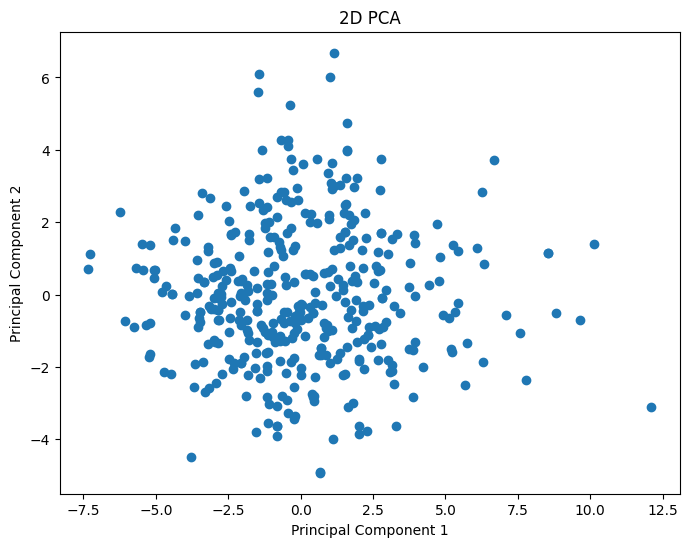

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# df = df.drop('relax', axis=1)
df = df.select_dtypes(include=['int64', 'float64'])
features = df.columns
x = df.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Plotting the 2D visualization
plt.figure(figsize=(8,6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA')
plt.show()

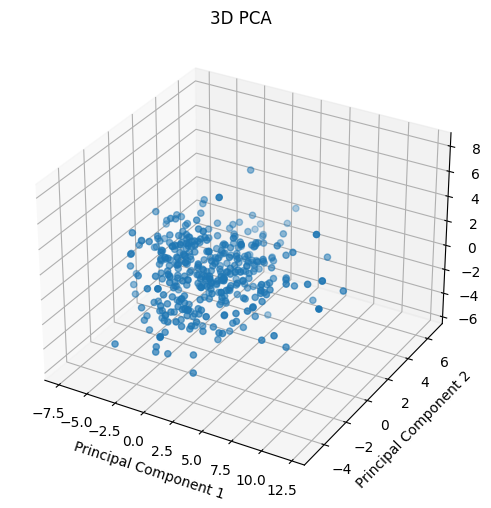

In [11]:
pca_3d = PCA(n_components=3)
principalComponents_3d = pca_3d.fit_transform(x)
principalDf_3d = pd.DataFrame(data = principalComponents_3d, columns = ['PC1', 'PC2', 'PC3'])

# Plotting the 3D visualization
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principalDf_3d['PC1'], principalDf_3d['PC2'], principalDf_3d['PC3'])
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA')
plt.show()

In [27]:
pca = PCA(n_components=0.95)
principalComponents = pca.fit_transform(x)
n_components = pca.n_components_
variance_explained = np.sum(pca.explained_variance_ratio_)
print(f"Number of components chosen to explain 95% of variance: {n_components}")
print(f"Total variance explained by the chosen components: {variance_explained:.2%}")
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(n_components)], index=df.columns)


# Calculate the sum of squared loadings for each feature
sum_of_squared_loadings = np.sum(pca.components_**2, axis=0)

# Create a Series with the sum of squared loadings
feature_influence = pd.Series(sum_of_squared_loadings, index=df.columns)

# Sort the series to identify the top 5 features
top_5_features = feature_influence.sort_values(ascending=False).head(5)

print(top_5_features)


Number of components chosen to explain 95% of variance: 35
Total variance explained by the chosen components: 95.26%
_Tempo_Mean                                       0.971186
_MFCC_Mean_10                                     0.967755
_HarmonicChangeDetectionFunction_PeriodFreq       0.964777
_HarmonicChangeDetectionFunction_PeriodEntropy    0.959483
_HarmonicChangeDetectionFunction_Slope            0.947941
dtype: float64


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df_new = pd.read_csv(file_path)

features_selected = df_new[['_Tempo_Mean', '_MFCC_Mean_10', '_HarmonicChangeDetectionFunction_PeriodFreq',
                          '_HarmonicChangeDetectionFunction_PeriodEntropy', '_HarmonicChangeDetectionFunction_Slope']]

target = df_new['Class']

X_train, X_test, y_train, y_test = train_test_split(features_selected, target, test_size=0.2, random_state=42)

# Initializing the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
clf.fit(X_train, y_train)

# Predicting the emotional states on the test set
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)


Accuracy: 0.375
              precision    recall  f1-score   support

       angry       0.40      0.44      0.42        18
       happy       0.32      0.39      0.35        18
       relax       0.56      0.38      0.45        26
         sad       0.25      0.28      0.26        18

    accuracy                           0.38        80
   macro avg       0.38      0.37      0.37        80
weighted avg       0.40      0.38      0.38        80



In [36]:
from sklearn.ensemble import RandomForestClassifier

# Assuming df_new is your dataframe and 'Class' is the target
X = df_new.drop('Class', axis=1)
y = df_new['Class']

# Initialize and train the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X, y)

# Get feature importances
importances = clf.feature_importances_

# Convert the importances into a DataFrame
features_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame to find the most important features
features_df = features_df.sort_values(by='Importance', ascending=False)

# Now you can select the top N features from this list
print(features_df.head())

                                       Feature  Importance
19                     _Zero-crossingrate_Mean    0.084525
45        _HarmonicChangeDetectionFunction_Std    0.079384
48  _HarmonicChangeDetectionFunction_PeriodAmp    0.077731
24                          _Pulseclarity_Mean    0.050932
44       _HarmonicChangeDetectionFunction_Mean    0.047061


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

df_new = pd.read_csv(file_path)

features_selected = df_new[['_Zero-crossingrate_Mean', '_HarmonicChangeDetectionFunction_Std', '_HarmonicChangeDetectionFunction_PeriodAmp',
                          '_Pulseclarity_Mean', '_HarmonicChangeDetectionFunction_Mean']]

target = df_new['Class']

X_train, X_test, y_train, y_test = train_test_split(features_selected, target, test_size=0.2, random_state=42)

# Initializing the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
clf.fit(X_train, y_train)

# Predicting the emotional states on the test set
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(report)

Accuracy: 0.7375
              precision    recall  f1-score   support

       angry       0.83      0.83      0.83        18
       happy       0.77      0.94      0.85        18
       relax       0.77      0.65      0.71        26
         sad       0.56      0.56      0.56        18

    accuracy                           0.74        80
   macro avg       0.73      0.75      0.74        80
weighted avg       0.74      0.74      0.73        80

